# The Problem With Missing Data

Get familiar with missing data and how it impacts your analysis! Learn about different null value operations in your dataset, how to find missing data and summarizing missingness in your data. 

## Why deal with missing data?

In data science, the first and foremost task while working with any data for analysis is to clean the messy data.

### Why does missing data exist?

Almost all real world data is messy and a large portion of it includes missing data.

Values might go missing during the data acquisition process due to technical problems (faulty sensor) or human error (incomplete survey response). Accidental deletion is another cause of missing data. Or many, many other causes.

### In this course you'll learn

* the significance of treating missing values
* to detect missing values in your messy data
* to analyze the types of missingness
* to treat the missing values appropriately for
    * numerical
    * time-series
    * categorical values
* to impute missing values using both simple and advanced techniques
* to evaluate the best method of treating missing values

### Workflow for treating missing values

1. convert all missing values to null values
2. analyze the amount and type of missingness in the data
3. appropriately delete or impute missing values
4. evaluate & compare the performance of the treated/imputed dataset

`None` or `np.nan` used extensively by Numpy and Pandas. There are some differences between the two. All operations on `np.nan` will return `np.nan`.

In [ ]:
print(None or True)
print(None or False)

In [ ]:
import numpy as np

print(np.nan or True)
print(np.nan or False)

In [ ]:
print(None + True)
print(None / 3)

In [ ]:
print(np.nan + True)
print(np.nan / 3)

In [ ]:
print(type(None))  # NoneType
print(type(np.nan))  # float

print(None == None)  # True
print(np.nan == np.nan)  # False

print(np.isnan(np.nan))  # True

#### Null value operations

While working with missing data, you'll have to store these missing values as an empty type. This way, you will easily be able to identify them, replace them or play with them! This is why we have the `None` and `numpy.nan` types. You need to be able to differentiate clearly between the two types.

In this exercise, you will compare the differences between the behavior of `None` and `numpy.nan` types on application of arithmetic and logical operations. `numpy` has already been imported as `np`. The `try` and except `blocks` have been used to avoid errors.

##### Instructions 1/4

* Sum two `None` values and print the output.


In [ ]:
try:
    # Print the sum of two None's
    print("Add operation output of 'None': ", None + None)
except TypeError:
    # Print if error
    print("'None' does not support Arithmetic Operations!!")

##### Instructions 2/4

* Sum two `np.nan` and print the output.

In [ ]:
try:
    # Print the sum of two np.nan's
    print("Add operation output of 'np.nan': ", np.nan + np.nan)
except TypeError:
    # Print if error
    print("'np.nan' does not support Arithmetic Operations!!")

##### Instructions 3/4

* Print the output of logical `or` of two `None`.

In [ ]:
try:
    # Print the output of logical OR of two None's
    print("OR operation output of 'None': ", None or None)
except TypeError:
    # Print if error
    print("'None' does not support Logical Operations!!")

##### Instructions 4/4

* Print the output of logical `or` of two `np.nan`.

In [ ]:
try:
    # Print the output of logical OR of two np.nan's
    print("OR operation output of 'np.nan': ", np.nan or np.nan)
except TypeError:
    # Print if error
    print("'np.nan' does not support Logical Operations!!")

#### Finding Null values

In the previous exercise, you have observed how the two NULL data types `None` and the `numpy` not a number object `np.nan` behave with respect to arithmetic and logical operations. In this exercise, you'll further understand their behavior by comparing the two types. The `numpy` package has already been imported as `np`.

##### Instructions 1/4

* Compare two `None` using `==` and print the output.


In [ ]:
try:
    # Print the comparison of two 'None's
    print("'None' comparison output: ", None == None)
except TypeError:
    # Print if error
    print("'None' does not support this operation!!")

##### Instructions 2/4

* Compare two `np.nan` using `==` and print the output.

In [ ]:
try:
    # Print the comparison of two 'None's
    print("'None' comparison output: ", np.nan == np.nan)

except TypeError:
    # Print if error
    print("'None' does not support this operation!!")

##### Instructions 3/4

* Check whether `None` is the same as `numpy`'s `nan` object using `np.isnan()`.

In [ ]:
try:
    # Check if 'None' is 'NaN'
    print("Is 'None' same as nan? ", np.isnan(None))

except TypeError:
    # Print if error
    print("Function 'np.isnan()' does not support this Type!!")

##### Instructions 4/4

* Check whether `np.isnan()` returns `True` for `np.nan`.

In [ ]:
try:
    # Check if 'np.nan' is 'NaN'
    print("Is 'np.nan' same as nan? ", np.isnan(np.nan))

except TypeError:
    # Print if error
    print("Function 'np.isnan()' does not support this Type!!")

## Handling Missing Values

Missing values are usually filled with dummy values such as `NA`, `-`, `.`, etc.

```python
college = pd.read_csv("college.csv")
college.head()  # look at first few rows, appears there is missing data
```

```text
   gradrat   lenroll  rmbrd  private  stufac    csat   act
0     59.0  5.176150   3.75      1.0    10.8       .  21.0
1     52.0  4.779123   3.74      1.0    17.7       .  21.0
2     75.0  6.122493      .      1.0    11.4  1052.0  24.0
3     56.0  5.318120   4.10      1.0    11.6   940.0  23.0
4     71.0  5.631212      .      1.0    18.3       .  17.0
```

```python
college.info()
```

```text
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries,0 to 199
Data columns (total 7 columns):
#  Column   Non-Null Count  Dtype
-- ------   --------------  -----
0  gradrat  200 non-null    object
1  lenroll  200 non-null    object
2  rmbrd    200 non-null    object
3  private  200 non-null    float64
4  stufac   200 non-null    object
5  csat     200 non-null    object
6  act      200 non-null    object
dtypes: float64(1), object(6)
memory usage: 11.1+ KB
```

Something is odd, all the rows except `private` are of type `object` when they should be float.

We can explore further by looking at the unique values in one of the columns to find any non-numeric values.
```python
csat_unique = college.csat.unique()
np.sort(csat_unique)
```

From the output we can see "`.`" is the only string value present. We will replace it with `NaN`.

```python
college = pd.read_csv('college.csv', na_values = ".")
college.head()
```

```text
   gradrat   lenroll  rmbrd  private  stufac    csat   act
0     59.0  5.176150   3.75      1.0    10.8     NaN  21.0
1     52.0  4.779123   3.74      1.0    17.7     NaN  21.0
2     75.0  6.122493    NaN      1.0    11.4  1052.0  24.0
3     56.0  5.318120   4.10      1.0    11.6   940.0  23.0
4     71.0  5.631212    NaN      1.0    18.3     NaN  17.0
```

And we'll see that the columns are now of type float.

```python
college.info()
```

```text
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries,0 to 199
Data columns (total 7 columns):
#  Column   Non-Null Count  Dtype
-- ------   --------------  -----
0  gradrat  200 non-null    float64
1  lenroll  200 non-null    float64
2  rmbrd    200 non-null    float64
3  private  200 non-null    float64
4  stufac   200 non-null    float64
5  csat     200 non-null    float64
6  act      200 non-null    float64
dtypes: float64(1), object(6)
memory usage: 11.1+ KB
```

In [28]:
import pandas as pd
import numpy as np

# my version has some missing and some explicitly 0 BMI values
diabetes = pd.read_csv("data/pima-indians-diabetes-data.csv")
diabetes.head()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0.0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,0.0,0.167,21,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0


We see that there are `NaN` values in the data set.

In [29]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnant           768 non-null    float64
 1   Glucose            763 non-null    float64
 2   Diastolic_BP       733 non-null    float64
 3   Skin_Fold          541 non-null    float64
 4   Serum_Insulin      394 non-null    float64
 5   BMI                757 non-null    float64
 6   Diabetes_Pedigree  768 non-null    float64
 7   Age                768 non-null    int64  
 8   Class              768 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


All the columns are numeric as expected. We see that some columns have null values (< 768 non-null).

We can analyze further using the `describe()` method.

In [30]:
# describe() now excludes NaN values
diabetes.describe()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,31.963276,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,7.911262,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We see that `BMI` has at least one row whose value is 0. Knowing this is odd requires some domain knowledge.

In [36]:
# diabetes.query("BMI == 0",).count()
diabetes.loc[diabetes["BMI"] == 0, "BMI"].count()

11

Turns out there are 11 rows where `BMI` is 0.

In [4]:
np.isnan(diabetes).sum()

Pregnant               0
Glucose                5
Diastolic_BP          35
Skin_Fold            227
Serum_Insulin        374
BMI                   11
Diabetes_Pedigree      0
Age                    0
Class                  0
dtype: int64

 We now know there are 11 rows in `BMI` whose value is NaN and 11 more whose value is 0.

 We can combine the two tests as follows:

In [38]:
# combine the tests
# z_or_n = diabetes["BMI"].isin([0, np.nan])
# diabetes[z_or_n]

diabetes.loc[diabetes["BMI"].isin([0, np.nan]), "BMI"]

3      0.0
9      NaN
18     0.0
29     0.0
49     NaN
60     NaN
77     0.0
81     NaN
145    NaN
149    0.0
343    0.0
371    NaN
372    0.0
426    NaN
442    0.0
494    NaN
512    0.0
522    NaN
645    0.0
684    NaN
706    NaN
757    0.0
Name: BMI, dtype: float64

We believe these rows with 0 must be missing values. This kind of missing values can be tricky as they require some level of domain knowledge to spot and correct.

In [39]:
# replace missing values with NaN
# diabetes.BMI[diabetes.BMI == 0] = np.nan
diabetes.loc[diabetes["BMI"] == 0, "BMI"] = np.nan

# select rows with NaN with any of the following
diabetes.loc[np.isnan(diabetes["BMI"]), "BMI"]  # or
# diabetes.loc[diabetes["BMI"].isna(), "BMI"]  # or
# diabetes.loc[diabetes["BMI"].isnull(), "BMI"]

3     NaN
9     NaN
18    NaN
29    NaN
49    NaN
60    NaN
77    NaN
81    NaN
145   NaN
149   NaN
343   NaN
371   NaN
372   NaN
426   NaN
442   NaN
494   NaN
512   NaN
522   NaN
645   NaN
684   NaN
706   NaN
757   NaN
Name: BMI, dtype: float64

In [ ]:
np.isnan(diabetes["BMI"])

#### Detecting missing values

Datasets usually come with hidden missing values filled in for missing values like `'NA'`, `'.'` or others. In this exercise, you will work with the `college` dataset which contains various details of college students. Your task is to identify the missing values by analyzing the dataset.

To achieve this, you can use the `.info()` method from `pandas` and the `numpy` function `sort()` along with the `.unique()` method to clearly distinguish the dummy value representing the missing data.

The `college.csv` file has been loaded for you. The packages `numpy` and `pandas` have already been imported as `np` and `pd` respectively.

##### Instructions 1/4

* Read the CSV version of the dataset into a `pandas` DataFrame.


In [40]:
# Read the dataset 'college.csv'
college = pd.read_csv("data/college.csv")
print(college.head())

  gradrat            lenroll rmbrd  private stufac    csat   act
0    59.0       5.1761497326  3.75      1.0   10.8       .  21.0
1    52.0       4.7791234931  3.74      1.0   17.7       .  21.0
2    75.0  6.122492809500001     .      1.0   11.4  1052.0  24.0
3    56.0       5.3181199938   4.1      1.0   11.6   940.0  23.0
4    71.0  5.631211781799999     .      1.0   18.3       .  17.0


##### Instructions 2/4

* Print the DataFrame information.

In [42]:
print(college.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gradrat  200 non-null    object 
 1   lenroll  200 non-null    object 
 2   rmbrd    200 non-null    object 
 3   private  200 non-null    float64
 4   stufac   200 non-null    object 
 5   csat     200 non-null    object 
 6   act      200 non-null    object 
dtypes: float64(1), object(6)
memory usage: 11.1+ KB
None


##### Instructions 3/4

* Store the unique values of the `csat` column to `csat_unique`.

In [43]:
# Store unique values of 'csat' column to 'csat_unique'
csat_unique = college["csat"].unique()

##### Instructions 4/4

* Sort `csat_unique` and print the output.

In [44]:
print(np.sort(csat_unique))

['.' '1000.0' '1006.0' '1010.0' '1013.0' '1020.0' '1024.0' '1026.0'
 '1028.0' '1036.0' '1039.0' '1040.0' '1044.0' '1045.0' '1050.0' '1052.0'
 '1060.0' '1070.0' '1080.0' '1092.0' '1096.0' '1109.0' '1111.0' '1120.0'
 '1139.0' '1150.0' '1171.0' '1200.0' '1210.0' '1220.0' '1230.0' '1270.0'
 '1292.0' '1324.0' '1381.0' '741.0' '763.0' '764.0' '782.0' '800.0'
 '802.0' '810.0' '813.0' '814.0' '816.0' '825.0' '830.0' '832.0' '837.0'
 '843.0' '846.0' '850.0' '853.0' '854.0' '860.0' '863.0' '867.0' '871.0'
 '880.0' '881.0' '885.0' '890.0' '891.0' '895.0' '897.0' '900.0' '902.0'
 '905.0' '911.0' '917.0' '919.0' '923.0' '937.0' '940.0' '943.0' '947.0'
 '950.0' '951.0' '964.0' '970.0' '979.0' '980.0' '989.0' '992.0' '994.0'
 '996.0' '997.0' '998.0']


#### Replacing missing values

In the previous exercise, you analyzed the college dataset and identified that `'.'` represented a missing value in the data. In this exercise, you will learn the best way to handle such values using the `pandas` module.

You will learn how to handle such values when importing a CSV file into `pandas` using its `read_csv()` function and adjusting its `na_values` argument, which allows you to specify the DataFrame's missing values.

The dataset has been loaded as `college.csv`. Both `pandas` and `numpy` have already been imported as `pd` and `np` respectively.

##### Instructions 1/2

* Load the dataset `'college.csv'` to the DataFrame `college` while setting the appropriate missing values.


In [46]:
college = pd.read_csv("data/college.csv", na_values=".")
print(college.head())

   gradrat   lenroll  rmbrd  private  stufac    csat   act
0     59.0  5.176150   3.75      1.0    10.8     NaN  21.0
1     52.0  4.779123   3.74      1.0    17.7     NaN  21.0
2     75.0  6.122493    NaN      1.0    11.4  1052.0  24.0
3     56.0  5.318120   4.10      1.0    11.6   940.0  23.0
4     71.0  5.631212    NaN      1.0    18.3     NaN  17.0


##### Instructions 2/2

* Print the DataFrame information.

In [47]:
print(college.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gradrat  187 non-null    float64
 1   lenroll  199 non-null    float64
 2   rmbrd    114 non-null    float64
 3   private  200 non-null    float64
 4   stufac   199 non-null    float64
 5   csat     105 non-null    float64
 6   act      104 non-null    float64
dtypes: float64(7)
memory usage: 11.1 KB
None


#### Replacing hidden missing values

In the previous two exercises, you worked on identifying and handling missing values while importing a dataset. In this exercise, you will work on identifying hidden missing values in your data and handling them. You'll use the `diabetes` dataset which has already been loaded for you.

The `diabetes` DataFrame has 0's in the column `BMI`. But `BMI` cannot be 0. It should instead be `NaN`. In this exercise, you'll learn to identify such discrepancies. You'll perform simple data analysis to catch missing values and replace them. Both `numpy` and `pandas` have been imported into your DataFrame as `np` and `pd` respectively.

Additionally, you can play around with the dataset like printing it's `.head()`, `.info()` etc. to get more familiar with the dataset.

##### Instructions 1/4

* Describe the basic statistics of `diabetes`.

In [49]:
diabetes = pd.read_csv("data/pima-indians-diabetes-data.csv")
diabetes.describe()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,31.963276,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,7.911262,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


##### Instructions 2/4

* Filter and print the values of `BMI` that are equal to `0`.

In [51]:
# Store all rows of the column 'BMI' that are equal to 0
# print(diabetes.BMI[diabetes.BMI == 0])
diabetes.loc[diabetes["BMI"] == 0, "BMI"]

3      0.0
18     0.0
29     0.0
77     0.0
149    0.0
343    0.0
372    0.0
442    0.0
512    0.0
645    0.0
757    0.0
Name: BMI, dtype: float64

##### Instructions 3/4

* Set all the values in the column `BMI` that are equal to `0` to `np.nan`.

In [53]:
# diabetes.BMI[diabetes.BMI == 0] = np.nan
diabetes.loc[diabetes["BMI"] == 0] = np.nan

##### Instructions 4/4

* Print the rows with `NaN` values in `BMI`.

In [55]:
# Print the 'NaN' values in the column BMI
# print(diabetes.BMI[np.isnan(diabetes.BMI)])
diabetes.loc[np.isnan(diabetes["BMI"]), "BMI"]

3     NaN
9     NaN
18    NaN
29    NaN
49    NaN
60    NaN
77    NaN
81    NaN
145   NaN
149   NaN
343   NaN
371   NaN
372   NaN
426   NaN
442   NaN
494   NaN
512   NaN
522   NaN
645   NaN
684   NaN
706   NaN
757   NaN
Name: BMI, dtype: float64

## Analyze the amount of missingness

A basic analysis of missingness is to find the total number and percentage of missing values for the data set.

The air quality data set contains sensor readings of ozone, solar, temperature and wind and is a time-series data set.

In [57]:
air_quality = pd.read_csv("data/air-quality.csv", parse_dates=["Date"], index_col="Date")

air_quality.head()

,Ozone,Solar,Wind,Temp
Date,,,,
1976-05-01,41.0,190.0,7.4,67
1976-05-02,36.0,118.0,8.0,72
1976-05-03,12.0,149.0,12.6,74
1976-05-04,18.0,313.0,11.5,62
1976-05-05,NaN,NaN,14.3,56


0 could be a valid reading so we will look only at the `NaN`s.

In [58]:
air_quality_nullity = air_quality.isna()

air_quality_nullity.head()

,Ozone,Solar,Wind,Temp
Date,,,,
1976-05-01,False,False,False,False
1976-05-02,False,False,False,False
1976-05-03,False,False,False,False
1976-05-04,False,False,False,False
1976-05-05,True,True,False,False


In [59]:
# get counts
air_quality_nullity.sum()

Ozone    37
Solar     7
Wind      0
Temp      0
dtype: int64

In [60]:
# get the percentage of nullity
air_quality_nullity.mean() * 100

Ozone    24.183007
Solar     4.575163
Wind      0.000000
Temp      0.000000
dtype: float64

<Axes: >

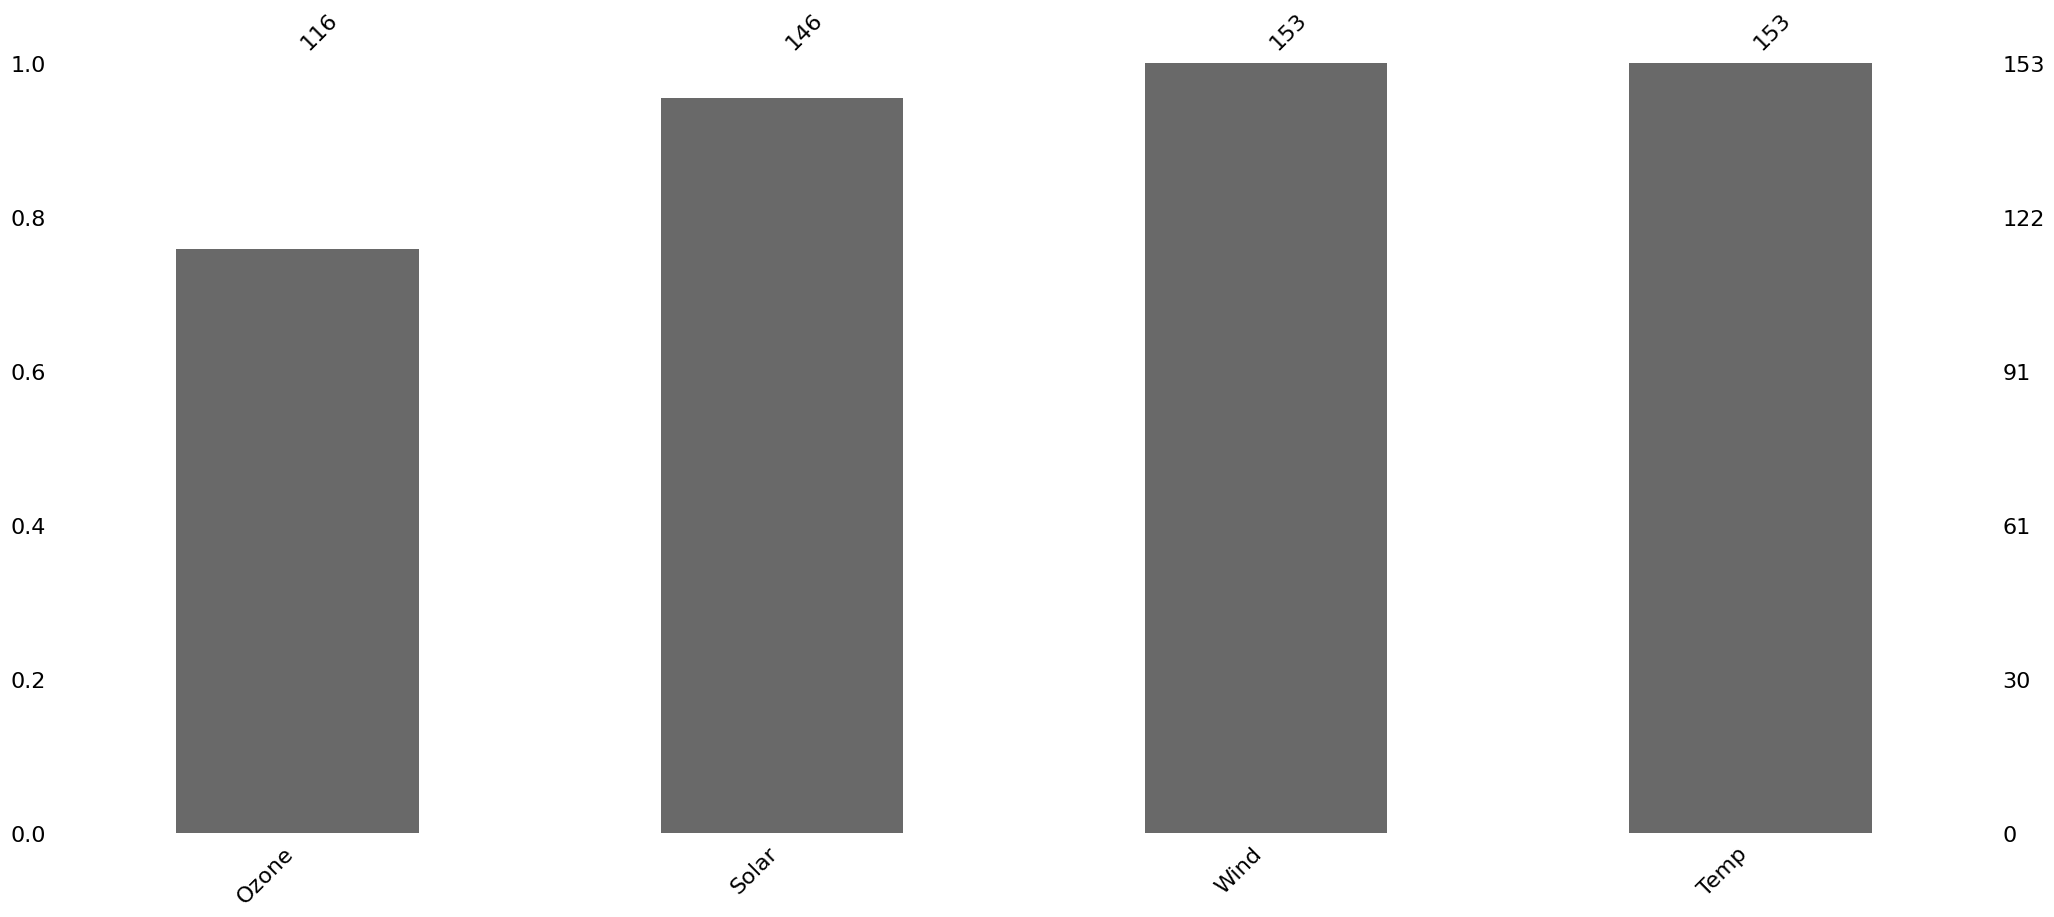

In [61]:
# visualize the missingness as a bar graph of non-null values per column
import missingno as msno

msno.bar(air_quality)

<Axes: >

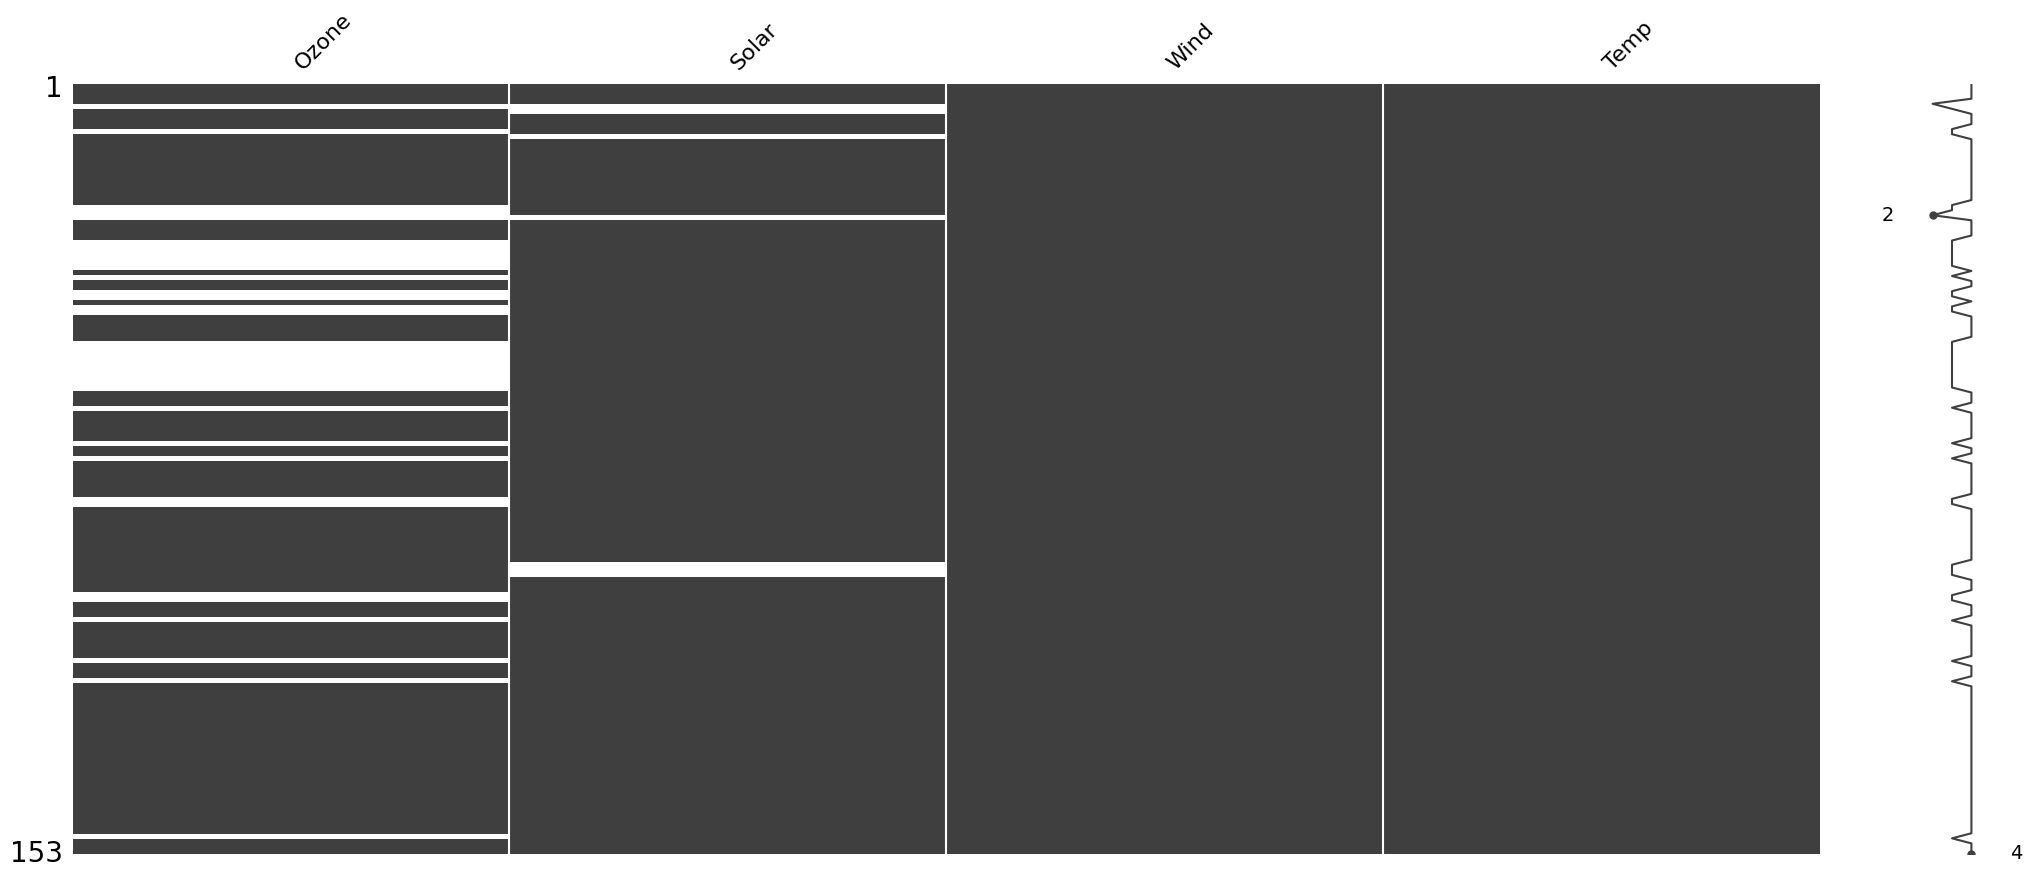

In [64]:
# visualize the missingness as a matrix
msno.matrix(air_quality)

# the sparkline summarizes the general shape of data completeness and points out
# the row with the minimum number of null values in the DataFrame as well as

Since this is a time-series data set we can set the frequency to "month" (`"M"`) to get a nullity matrix over time. This will help us see if there is a time component to the missing data, for example. In this case it seems that we are missing data from the month of June.

<Axes: >

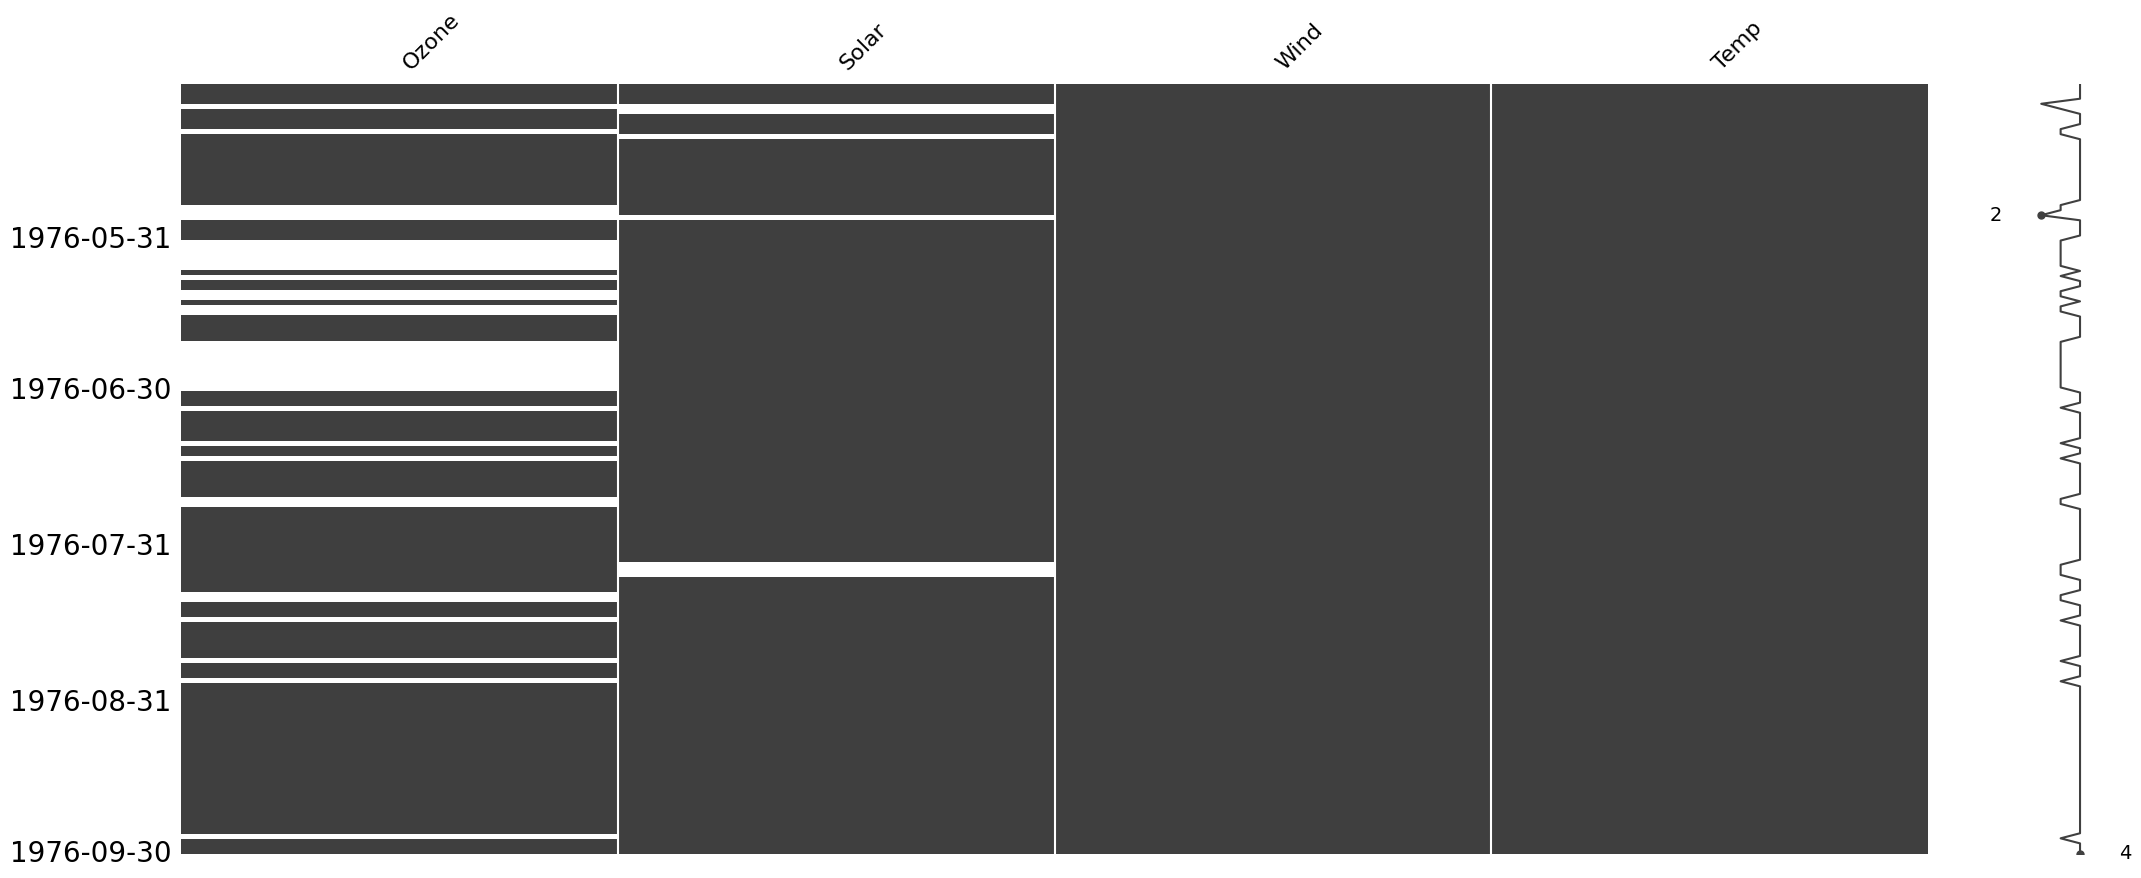

In [65]:
msno.matrix(air_quality, freq="M")

We can further slice the dataframe between the months of May and June to "zoom in" and get more clarity on the missingness.

Slicing is very useful when working with large data sets.

<Axes: >

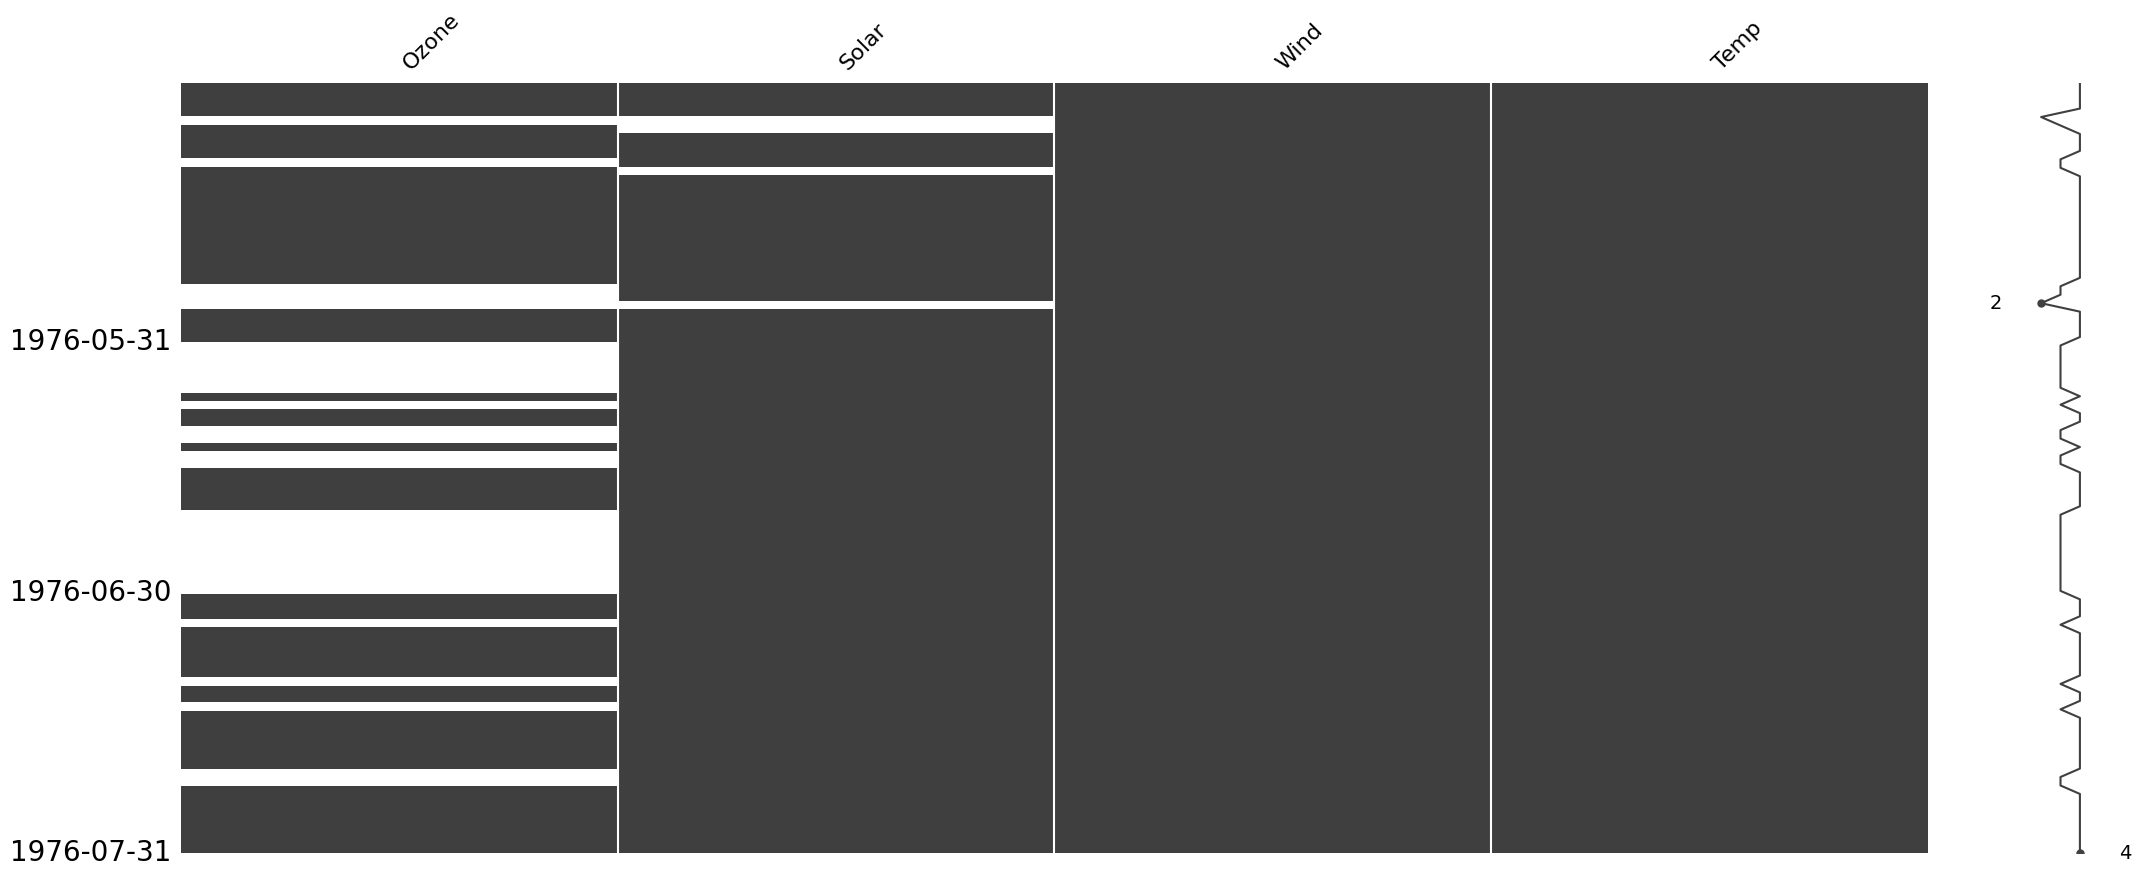

In [66]:
msno.matrix(air_quality.loc["May-1976":"Jul-1976"], freq="M")

#### Analyzing missingness percentate

Before jumping into treating missing data, it is essential to analyze the various factors surrounding missing data. The elementary step in analyzing the data is to analyze the amount of missingness, that is the number of values missing for a variable. In this exercise, you'll calculate the total number of missing values per column and also find out the percentage of missing values per column.

In this exercise, you will load the `'airquality'` dataset by parsing the `Date` column and then calculate the sum of missing values and the degree of missingness in percent on the nullity DataFrame

##### Instructions 1/3

* Load `'air-quality.csv'` into a pandas DataFrame while parsing the `'Date'` column and setting it to the index column as well.

In [67]:
airquality = pd.read_csv("data/air-quality.csv", parse_dates=["Date"], index_col="Date")

##### Instructions 2/3

* Calculate the number of missing values in `airquality` by summing `airquality_nullity`.

In [72]:
airquality_nullity = airquality.isna()

print(airquality_nullity.head())
print("\nTotal missing values:")
print(airquality_nullity.sum())

            Ozone  Solar   Wind   Temp
Date                                  
1976-05-01  False  False  False  False
1976-05-02  False  False  False  False
1976-05-03  False  False  False  False
1976-05-04  False  False  False  False
1976-05-05   True   True  False  False

Total missing values:
Ozone    37
Solar     7
Wind      0
Temp      0
dtype: int64


##### Instructions 3/3

* Calculate the percentage of missing values in airquality.

In [73]:
print("% of missing values")
print(airquality_nullity.mean() * 100)

% of missing values
Ozone    24.183007
Solar     4.575163
Wind      0.000000
Temp      0.000000
dtype: float64


#### Visualize missingness

In the previous exercise, you calculated the number of missing values and the percentage of missingness for each column. However, this is usually not enough and preference is to visualize them graphically.

You'll use the `misssingno` package which is built for visualizing missing values. The `airquality` DataFrame has already been imported, and the `pandas` library as `pd`.

You will visualize the missingness by plotting a bar chart and a nullity matrix of the missing values.

#### Instructions 1/4

* Plot a bar chart of the missing values in `airquality`.

<Axes: >

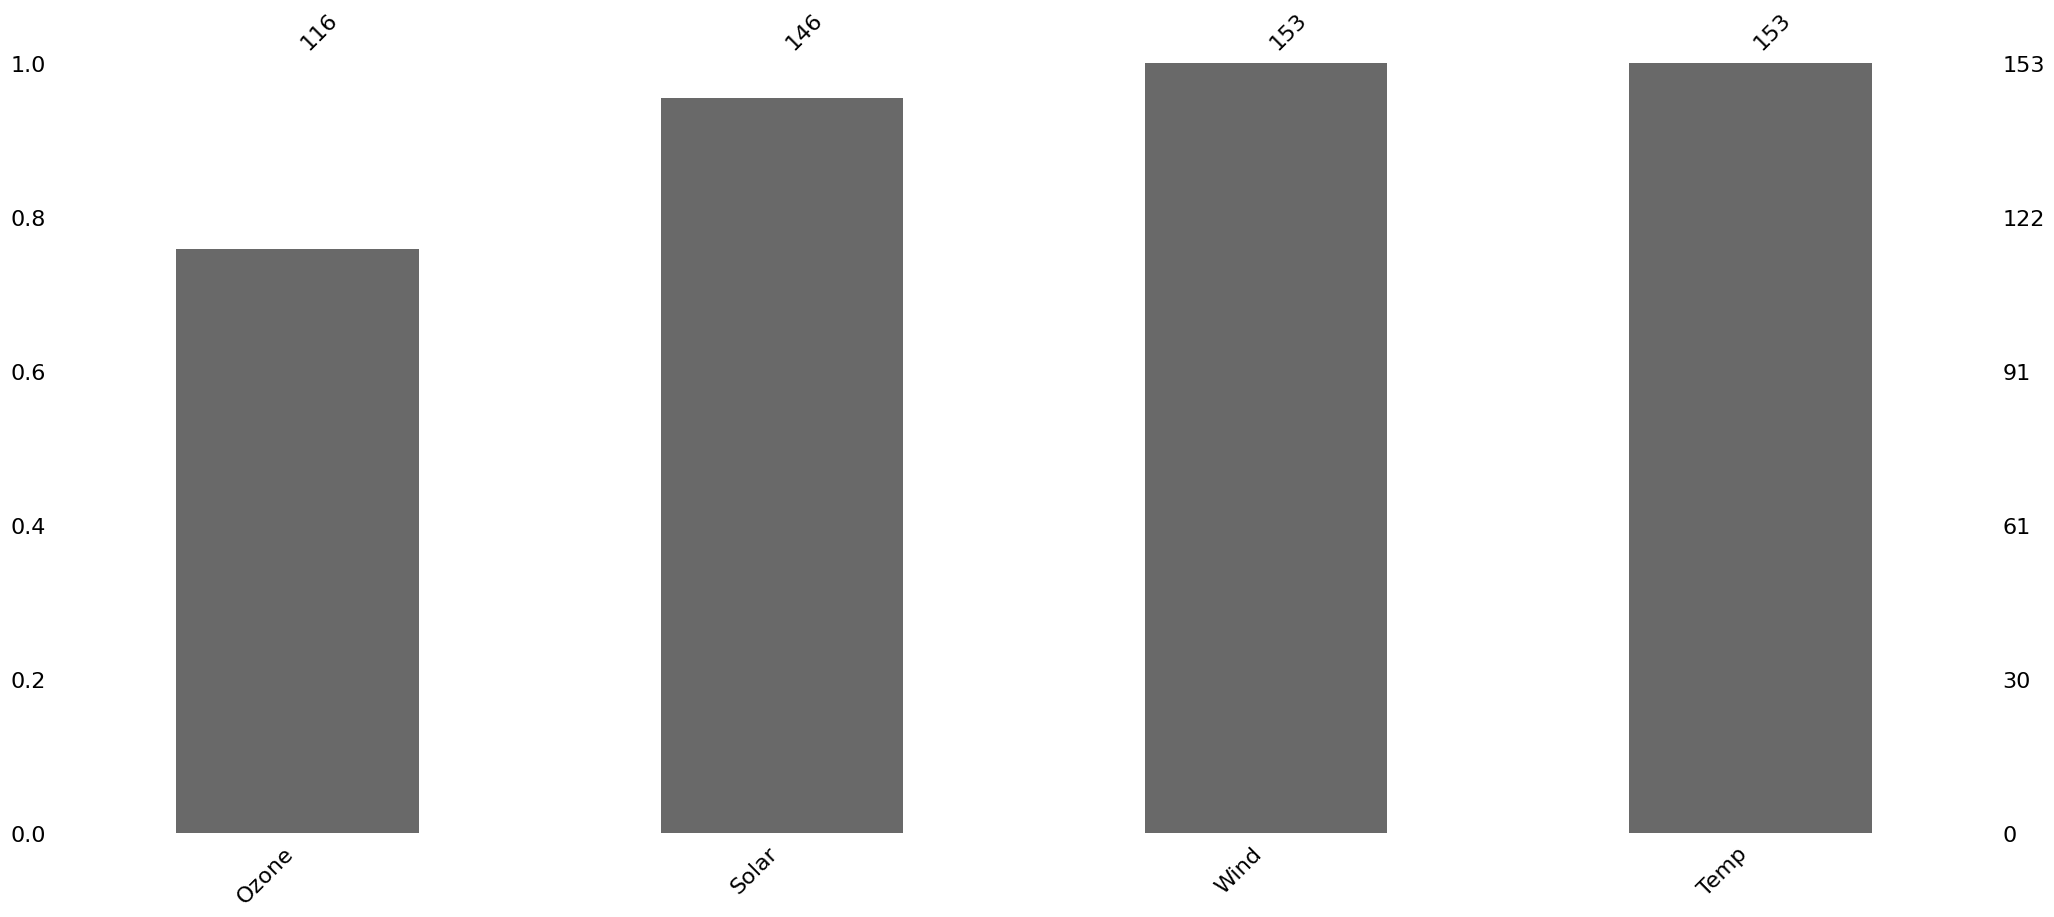

In [75]:
import missingno as msno

# plot bar chart of the missing and non-missing values
msno.bar(airquality)

#### Instructions 2/4

* Plot the nullity matrix of `airquality`.

<Axes: >

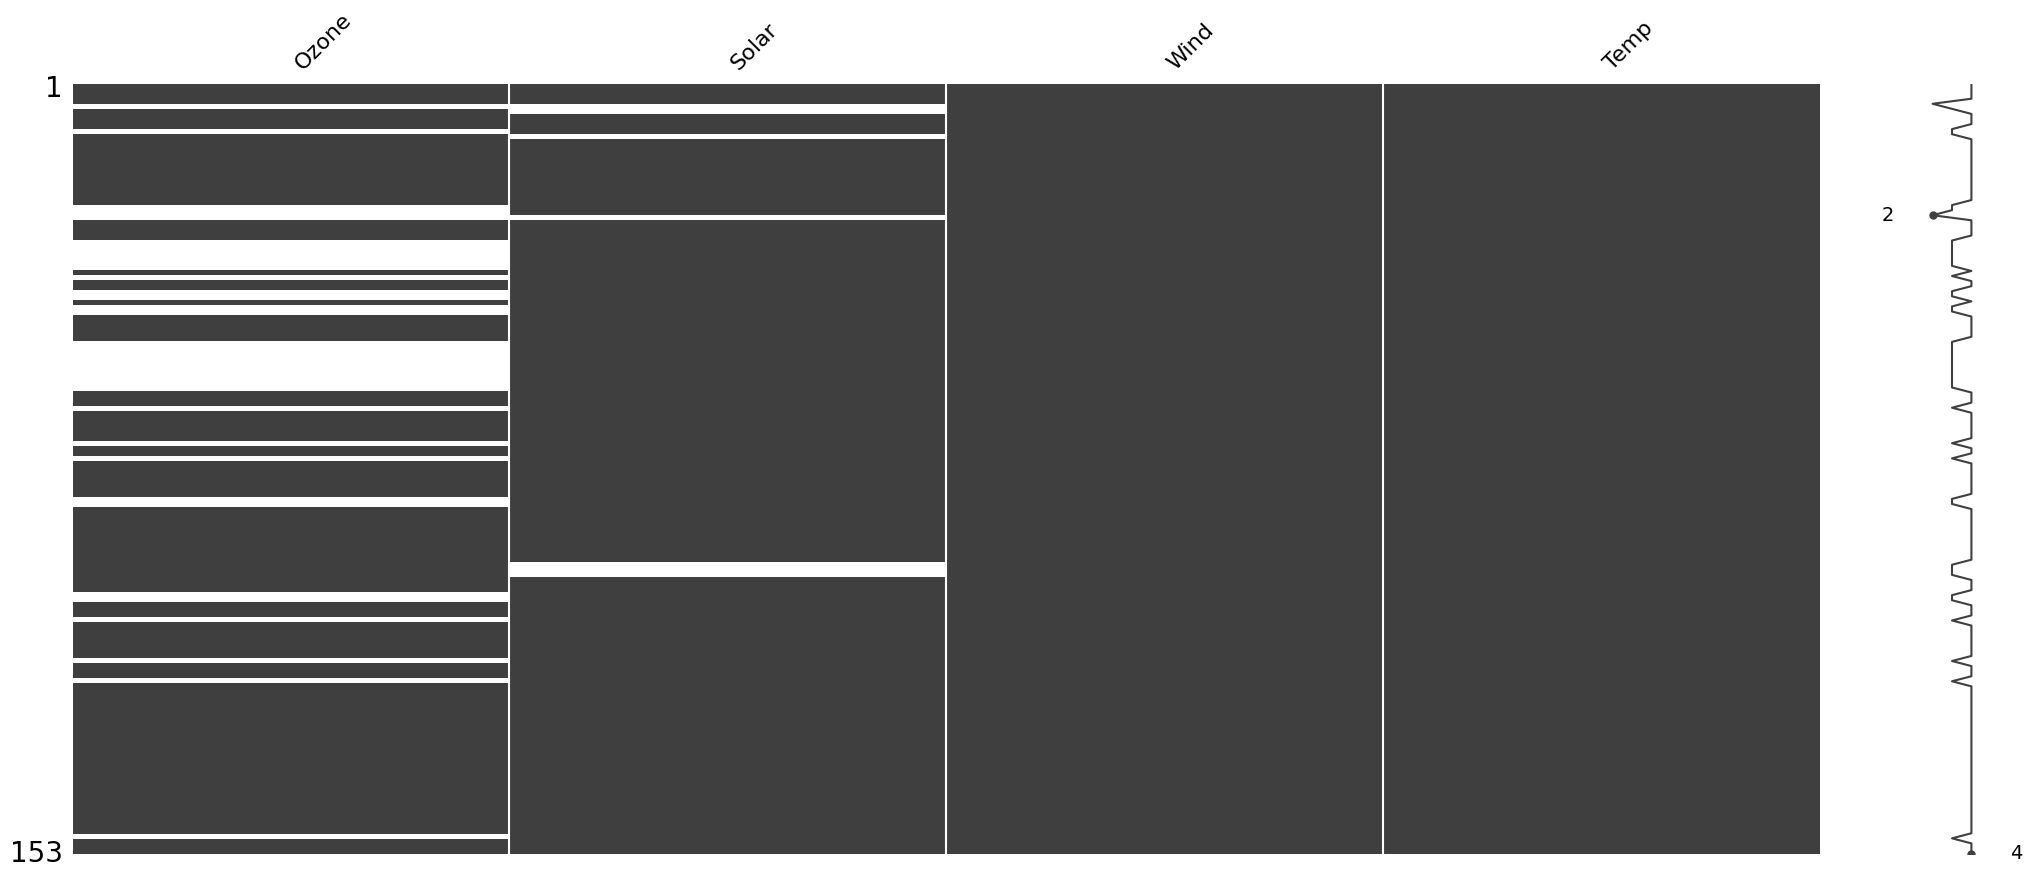

In [76]:
# Plot nullity matrix of airquality
msno.matrix(airquality)

#### Instructions 3/4

* Plot the nullity matrix of `airquality` across a monthly frequency.

<Axes: >

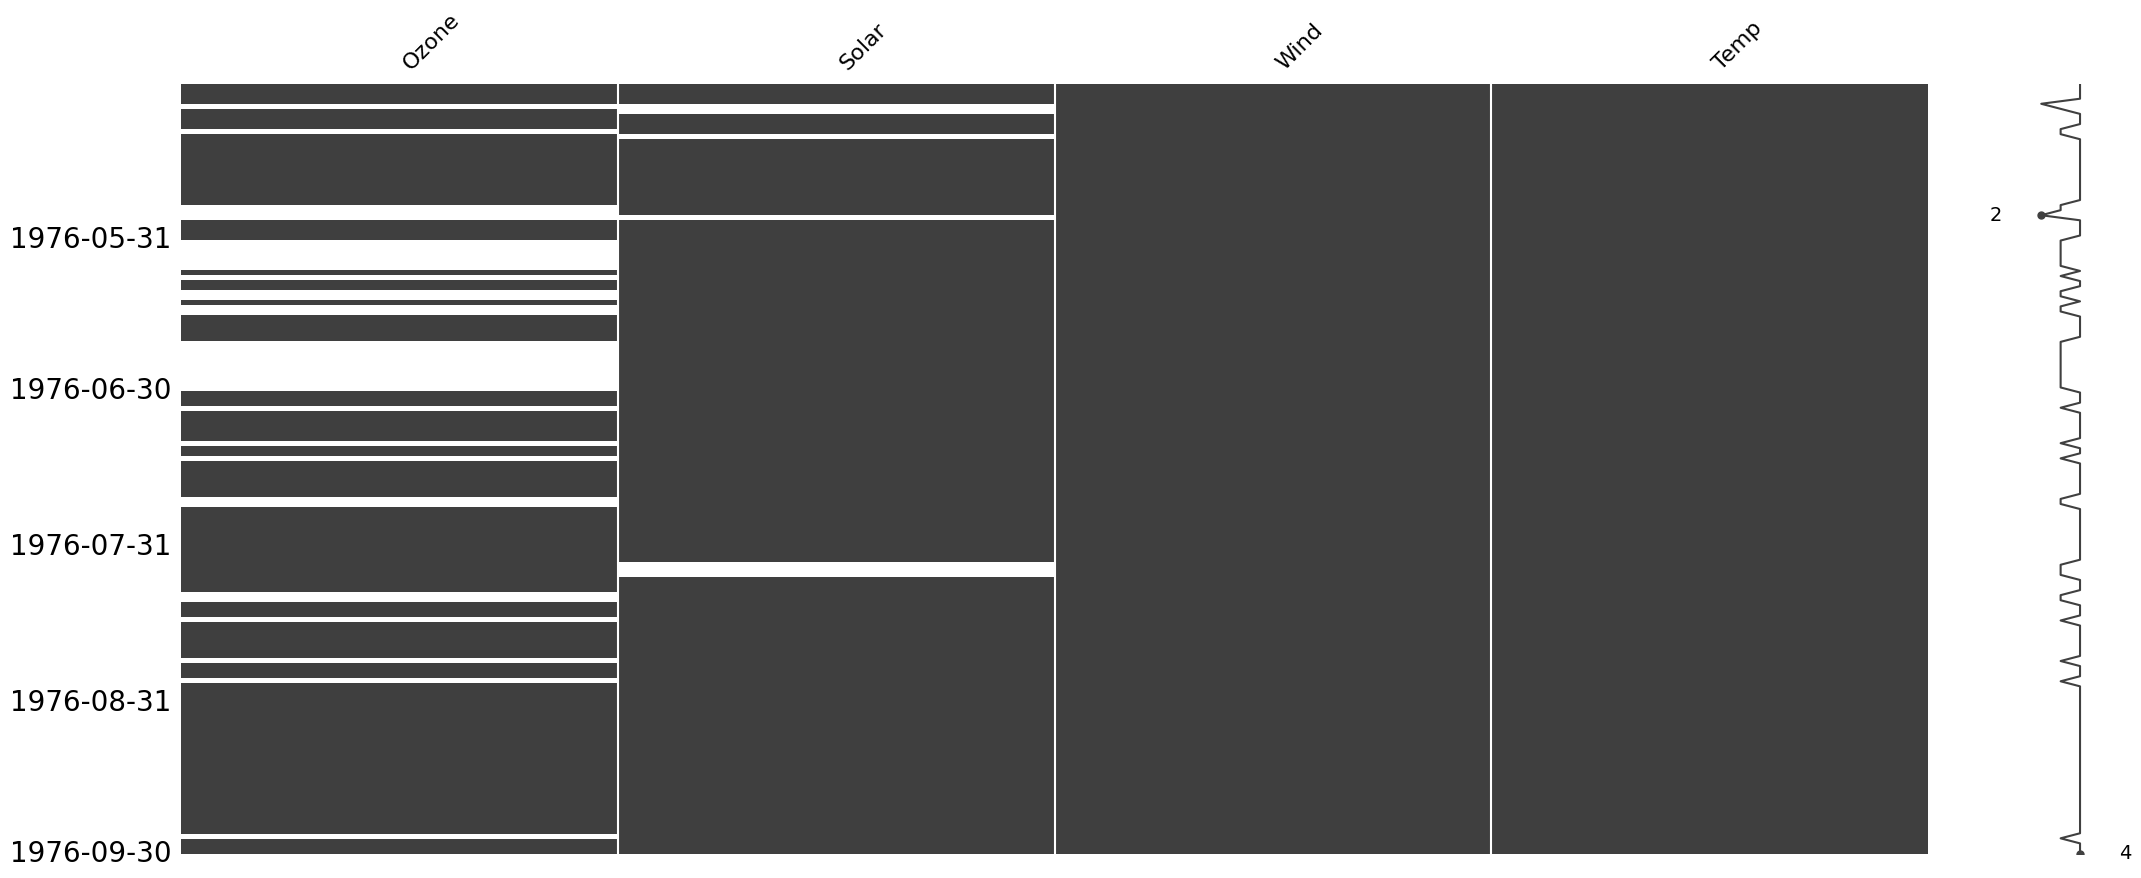

In [77]:
# Plot nullity matrix of airquality with frequency 'M'
msno.matrix(airquality, freq="M")

#### Instructions 4/4

* Splice `airquality` from `'May-1976'` to `'Jul-1976'` and plot its nullity matrix.

<Axes: >

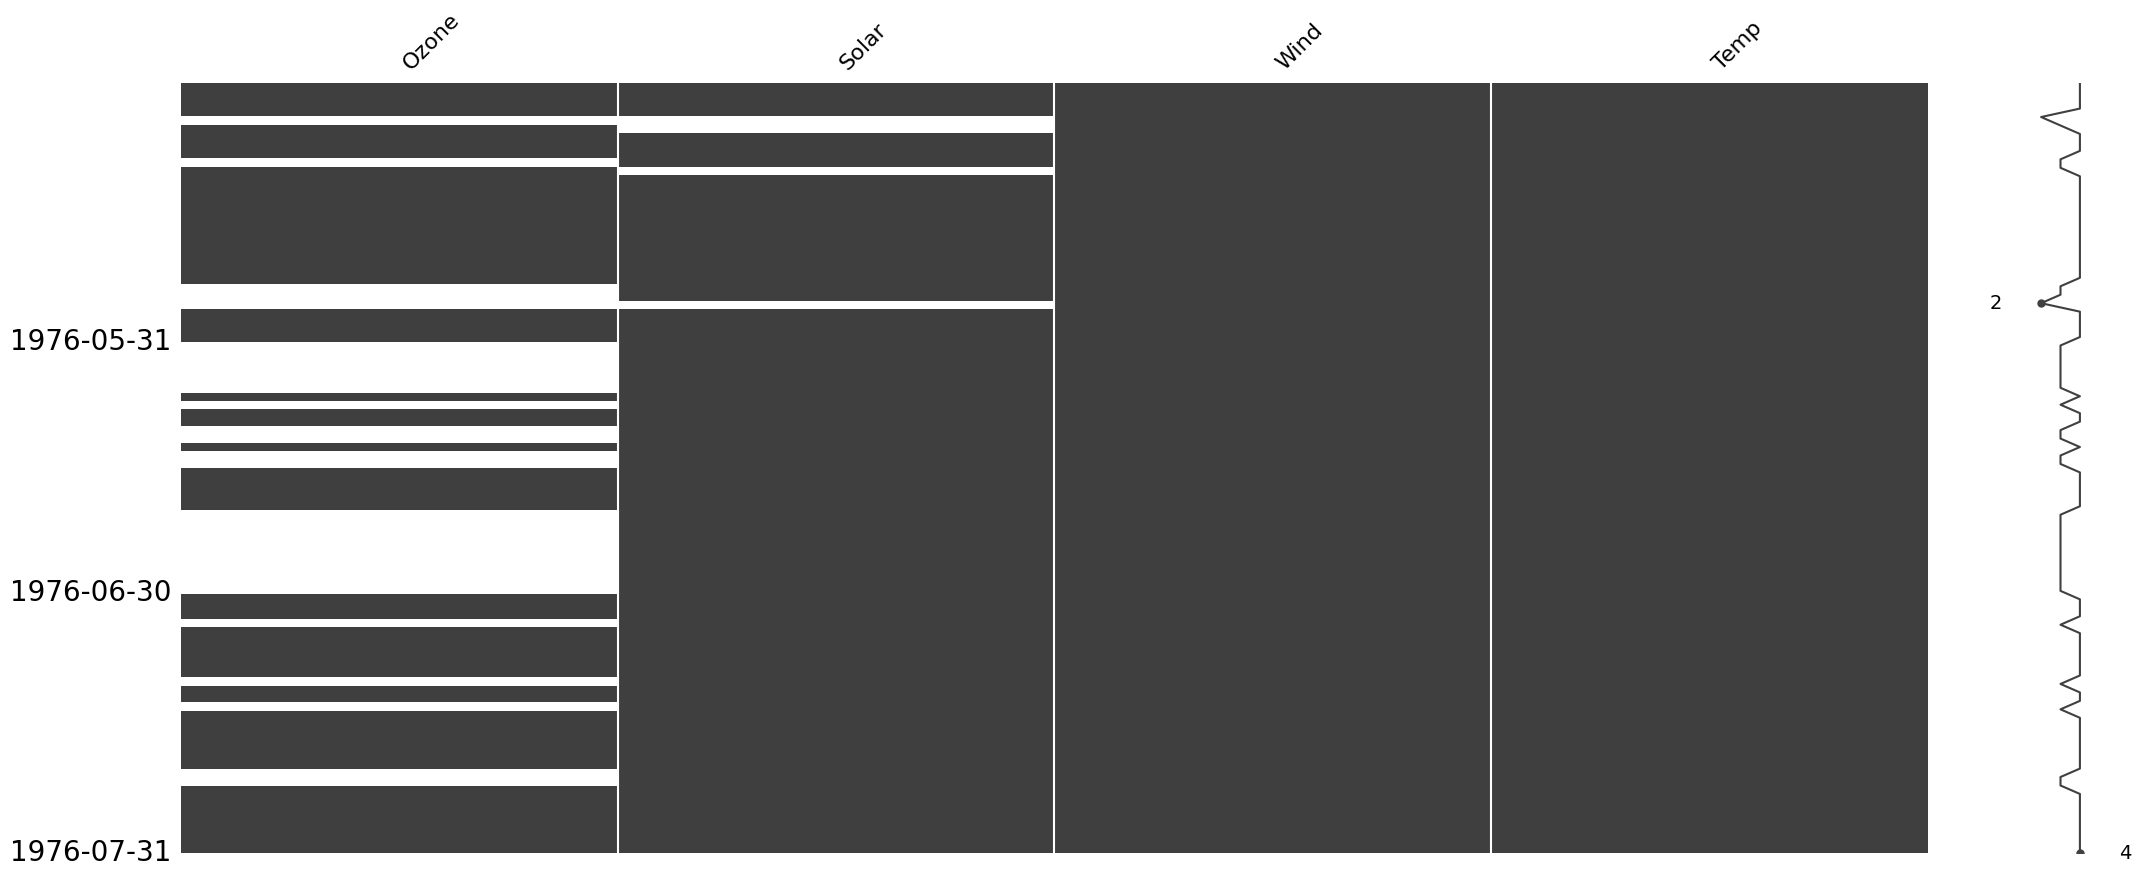

In [79]:
# Plot the sliced nullity matrix of airquality with frequency 'M'
msno.matrix(airquality.loc["May-1976":"Jul-1976"], freq="M")